<h1> Eptiope Prediction </h1>
<h3> by Benjamin Schubert </h3>

This tutorial illustrates the use of Fred2 to predict HLA-I/II epitopes and how to analyse results. Fred2 offers a long list of epitope prediction methods and was designed in such a way that extending Fred2 with your favourit method is easy.

This tutorial will entail:
- Simple epitope prediction from a list of peptide sequences and protein sequences
- Manipulation of the results
- Consensus prediction with multiple prediction methods
- Integration of a new prediction method

<h2> Chapter 1: The basics </h2>
<br/>
We first start with importing the needed packages.

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

#is is needed as long as Fred2 is not installed properly
import sys 

sys.path.append("/Users/schubert/Dropbox/PhD/Porgramming/Fred2")
from Fred2.Core import Allele, Peptide, Protein,generate_peptides_from_protein
from Fred2.IO import read_lines, read_fasta
from Fred2.EpitopePrediction import EpitopePredictorFactory

Lets start of with something playn simple: Defining peptides, and HLA alleles. You find all basic classes under `Fred2.Core`. HLA alleles have to be defined in new nomenclature (see: <a href="http://hla.alleles.org/">http://hla.alleles.org/</a>). 

In [3]:
peptides = [Peptide("SYFPEITHI"),Peptide("FIASNGVKL"), Peptide("LLGATCMFV")]
allele = Allele("HLA-A*02:01")

Of course we don't have to specify all peptides and alleles by hand. We can also read those from file with `read_lines`. For doing so, the file has to contain the peptide sequences and HLA alleles one per line. 

In [4]:
peptides2 = read_lines("./data/peptides.txt", type=Peptide)
alleles = read_lines("./data/alleles.txt", type=Allele)

Proteins are a bit more compilcated. They require a amino acid sequence as well as a transcript and gene ID. If `read_lines` is used generic transcript IDs are generated. Or one can use `read_fasta` to read in protein sequences in FASTA format. But one has to specify at which position of the fasta entrys  the transcript ID is (based on the contained |). For example if the fasta file has the folloing structure


>\>ID_Type|Gene_ID|ID_Type|Trancsript_ID|comment<br/>
>AAAAAAAA

we would call read_fasta as followes:


In [5]:
proteins = read_fasta("./data/proteins.fasta", id_position=3, type=Protein)
print proteins

[PROTEIN: MKMRFFSSPCGKAAVDPADRCKEVQQIRDQHPSK (aa-seq)
		  NP_852610.1 (orig transcript)
		 VARIANTS:
, PROTEIN: IPVIIERYKGEKQLPVLDKTKFLVPDHVNMSELVKI (aa-seq)
		  NP_852610_part2 (orig transcript)
		 VARIANTS:
]


To be able to use proteins for prediction, we first have to generate k-mers of the sequences. For that we use the function `generate_peptides_from_protein`, which generates unique peptide k-mers based on the given protein sequences. These peptides are associated with the proteins from which they origin.

In [6]:
peptide3 = generate_peptides_from_protein(proteins, 9)

Fred2 has only one entry point to the different perdiction methods, namely `EpitopePredictorFactory`. It handels the initialization of the different methods and also collects newly implemented prediction methods if properly implemented. To see which prediction methods Fred2 supports `EpitopePredictorFactory` can helps here as well:

In [7]:
for name,version in EpitopePredictorFactory.available_methods().iteritems():
    print name, ",".join(version)

netmhc 3.4
smmpmbec 1.0
syfpeithi 1.0
netmhcpan 2.4
netctlpan 1.1
netmchiipan 3.0
tepitopepan 1.0
arb 1.0
pickpocket 1.1
epidemix 1.0
netmhcii 2.2
smm 1.0
comblibsidney 1.0
unitope 1.0
hammer 1.0
svmhc 1.0
bimas 1.0


Lets select one and do predictions. 

In [8]:
predictor = EpitopePredictorFactory("Syfpeithi")
results = predictor.predict(peptides2, alleles=alleles)
results.head()

,,A*02:01,B*15:01
Seq,Method,,
"(((A)), ((N)), ((G)), ((H)), ((D)), ((A)), ((K)), ((A)), ((K)))",syfpeithi,2,2
"(((A)), ((T)), ((L)), ((I)), ((S)), ((I)), ((N)), ((T)), ((H)))",syfpeithi,15,2
"(((H)), ((I)), ((S)), ((L)), ((A)), ((N)), ((G)), ((H)), ((D)))",syfpeithi,8,6
"(((I)), ((N)), ((T)), ((H)), ((I)), ((S)), ((L)), ((A)), ((N)))",syfpeithi,3,3
"(((I)), ((S)), ((I)), ((N)), ((T)), ((H)), ((I)), ((S)), ((L)))",syfpeithi,16,2


To initializea particular version of a prediction method, we can use the flage `version=""` when calling the PredictorFactories. If we do not specify any version, Fred2 will initialize the most recent version that is supported.

In [9]:
predictor = EpitopePredictorFactory("Syfpeithi", version="1.0")
results = predictor.predict(peptides2, alleles=alleles)
results.head()

,,A*02:01,B*15:01
Seq,Method,,
"(((A)), ((N)), ((G)), ((H)), ((D)), ((A)), ((K)), ((A)), ((K)))",syfpeithi,2,2
"(((A)), ((T)), ((L)), ((I)), ((S)), ((I)), ((N)), ((T)), ((H)))",syfpeithi,15,2
"(((H)), ((I)), ((S)), ((L)), ((A)), ((N)), ((G)), ((H)), ((D)))",syfpeithi,8,6
"(((I)), ((N)), ((T)), ((H)), ((I)), ((S)), ((L)), ((A)), ((N)))",syfpeithi,3,3
"(((I)), ((S)), ((I)), ((N)), ((T)), ((H)), ((I)), ((S)), ((L)))",syfpeithi,16,2


External tools like `NetMHC` offer two additional flags when calling `.predict()`, `command="/path/to/binary"` and `options="command options"`. `command=""` specifies the path to an alternative binary that should be used instead of the one that is globally registered. With `options=""` you can specify additional commands that will directly be passed to the commandline call without any sanity checks.

In [10]:
predictor = EpitopePredictorFactory("Syfpeithi", version="1.0")
results = predictor.predict(peptides2, alleles=alleles, options="-s -b") 
results.head()

,,A*02:01,B*15:01
Seq,Method,,
"(((A)), ((N)), ((G)), ((H)), ((D)), ((A)), ((K)), ((A)), ((K)))",syfpeithi,2,2
"(((A)), ((T)), ((L)), ((I)), ((S)), ((I)), ((N)), ((T)), ((H)))",syfpeithi,15,2
"(((H)), ((I)), ((S)), ((L)), ((A)), ((N)), ((G)), ((H)), ((D)))",syfpeithi,8,6
"(((I)), ((N)), ((T)), ((H)), ((I)), ((S)), ((L)), ((A)), ((N)))",syfpeithi,3,3
"(((I)), ((S)), ((I)), ((N)), ((T)), ((H)), ((I)), ((S)), ((L)))",syfpeithi,16,2


<h2> Chapter 2: Data manipulation and consensus prediction</h2>
<br/>
The predictor all return a data table like object (DataFrame) storing the peptide and allele objects, as well as the predicted results. Because it is a inherited pandas DataFrame we can do all sorts of nifty thinks. 

For example exporting the results to csv:

In [34]:
results.to_csv('./data/test.csv', sep='\t')

Or we could plot the score distribution of a particular HLA allele.

array([[<matplotlib.axes.AxesSubplot object at 0x105e1cf10>,
        <matplotlib.axes.AxesSubplot object at 0x105fcd6d0>]], dtype=object)

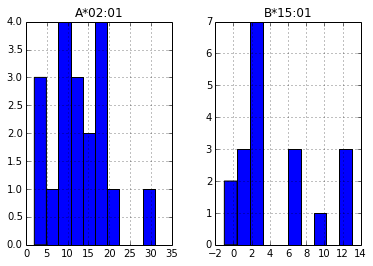

In [35]:
results.hist()

To combine prediction results we can use `merge_results` from `Fred2.Core`. In addition to the result objecte we want to merge, also have to specify the type of these objects (here `EpitopePredictionResult`). The function will return a merged results object of the same type.

In [36]:

results = [EpitopePredictorFactory(m).predict(peptides,alleles=alleles) 
                    for m in ["Syfpeithi","BIMAS","SMM","SVMHC"]]
df = results[0].merge_results(results[1:])
df


A*02:01  \
Seq                                                Method                   
(((F)), ((I)), ((A)), ((S)), ((N)), ((G)), ((V)... bimas        13.511718   
                                                   smm         438.641785   
                                                   svmhc        -0.358894   
                                                   syfpeithi    25.000000   
(((L)), ((L)), ((G)), ((A)), ((T)), ((C)), ((M)... bimas       650.311200   
                                                   smm          27.108782   
                                                   svmhc         0.969253   
                                                   syfpeithi    22.000000   
(((S)), ((Y)), ((F)), ((P)), ((E)), ((I)), ((T)... bimas         0.012331   
                                                   smm        2931.635689   
                                                   svmhc         0.096541   
                                                   syfpeithi    17.000000   

                                                                  B*15:01  
Seq                                                Method                  
(((F)), ((I)), ((A)), ((S)), ((N)), ((G)), ((V)... bimas         0.600000  
                                                   smm        4315.190768  
                                                   svmhc        -0.836802  
                                                   syfpeithi     7.000000  
(((L)), ((L)), ((G)), ((A)), ((T)), ((C)), ((M)... bimas         4.000000  
                                                   smm        3689.775986  
                                                   svmhc        -0.548826  
                                                   syfpeithi    10.000000  
(((S)), ((Y)), ((F)), ((P)), ((E)), ((I)), ((T)... bimas         0.014400  
                                                   smm        7014.552984  
                                                   svmhc        -0.524968  
                                                   syfpeithi     4.000000

We also can filter the predicted epitopes based on ther prediction values with the function `filter_result` from `Fred2.Core`. 

In [43]:
#you can either use pre-defined operators from `operator`
from operator import ge
#or define you own comparator function like this
comparator = lambda a,b: a > b

df.filter_result([("svmhc",comparator,0.0)])


A*02:01  \
Seq                                                Method                   
(((L)), ((L)), ((G)), ((A)), ((T)), ((C)), ((M)... bimas       650.311200   
                                                   smm          27.108782   
                                                   svmhc         0.969253   
                                                   syfpeithi    22.000000   
(((S)), ((Y)), ((F)), ((P)), ((E)), ((I)), ((T)... bimas         0.012331   
                                                   smm        2931.635689   
                                                   svmhc         0.096541   
                                                   syfpeithi    17.000000   

                                                                  B*15:01  
Seq                                                Method                  
(((L)), ((L)), ((G)), ((A)), ((T)), ((C)), ((M)... bimas         4.000000  
                                                   smm        3689.775986  
                                                   svmhc        -0.548826  
                                                   syfpeithi    10.000000  
(((S)), ((Y)), ((F)), ((P)), ((E)), ((I)), ((T)... bimas         0.014400  
                                                   smm        7014.552984  
                                                   svmhc        -0.524968  
                                                   syfpeithi     4.000000

With that one can combine several prediction tools to form a consensus prediction method.<br/><br/>
<h2> Chapter 3: Implementation of a new epitope prediction method </h2>
<br/>
Fred2 posseses a pontent plugin system allwoing the user to extend its capability quite easyly. To include a new epitope prediction method one simply has to inherite from `Fred2.Core.AEpitopePrediction` and implement its interface. For methods calling an external prediction tool additionally have to inherite from `Fred2.Core.AExternal`. SVM based methods also define a specific interface via `Fred2.Core.ASVM`. Fred2 uses SVMlight and its python binding svmlight 0.4.

If you want to be very specific and fully integrate your method in all of Fred2's capabilities please use one of the three major interfaces `APSSMEpitopePrediction`, `ASVMEpitopePrediction`, or `AExternalEpitopePrediction`from `Fred2.EpitopePrediction`.

In [11]:
from Fred2.EpitopePrediction import APSSMEpitopePrediction
from Fred2.Core import EpitopePredictionResult
import random
import pandas

class RandomEpitopePrediction(APSSMEpitopePrediction):
    __alleles = ["A*02:01"]
    __supported_length = [9]
    __name = "random"
    __version= "1.0"
    
    #the interface defines three class properties
    @property
    def name(self):
        #retunrs the name of the predictor
        return self.__name
    
    @property
    def supportedAlleles(self):
        #returns the supported alleles as strings (without the HLA prefix)
        return self.__alleles
    
    @property
    def supportedLength(self):
        #returns the supported epitope lengths as iterable
        return self.__supported_length
    
    @property
    def version(self):
        #returns the version of the predictor
        return self.__version
    
    #the interface defines a function converting Fred2's HLA allele presentation
    #into an internal presentation used by different methods.
    #for this predictor we won't need it but still have to provide it!
    #the function consumes a list of alleles and converts them into the internally used presentation
    def convert_alleles(self, alleles):
        #we just use the identity function
        return alleles
    
    #additionally the interface defines a function `predict` 
    #that consumes a list of peptides or a single peptide and optionally a list 
    #of allele objects
    #
    #this method implements the complete prediction routine
    def predict(self, peptides, alleles=None):
        
        #test whether one peptide or a list
        if isinstance(peptides, basestring):
            peptides = list(peptides)
        
        #if no alleles are specified do predictions for all supported alleles
        if alleles is None:
            alleles = self.supportedAlleles
        else:
            #filter for supported alleles
            alleles = filter(lambda a: a.name in self.supportedAlleles, alleles) 
        
        result = {}
        #now predict binding/non-binding for each peptide at random
        for a in alleles:
            result[a] = {}
            for p in peptides:
                if random.random() >= 0.5:
                    result[a][p] = 1.0
                else:
                    result[a][p] = 0.0
        
        #create EpitopePredictionResult object. This is a multiindexed DataFrame 
        #with Peptide and Method as multi-index and alleles as columns
        df_result = EpitopePredictionResult.from_dict(result)
        df_result.index = pandas.MultiIndex.from_tuples([tuple((i,self.name)) for i in df_result.index],
                                                        names=['Seq','Method'])
        return df_result
            
    
    
    

Now lets use our new predictor.

In [13]:
EpitopePredictorFactory("random").predict(peptides)

,,A*02:01
Seq,Method,
"(((F)), ((I)), ((A)), ((S)), ((N)), ((G)), ((V)), ((K)), ((L)))",random,0
"(((L)), ((L)), ((G)), ((A)), ((T)), ((C)), ((M)), ((F)), ((V)))",random,0
"(((S)), ((Y)), ((F)), ((P)), ((E)), ((I)), ((T)), ((H)), ((I)))",random,1


The predictor is now fully integrated and can be used in any context defined by Fred2.